In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('dados/missions_launched.csv')


In [65]:
data.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


In [66]:
data['Vehicle Type'].unique()

array(['Falcon 1', 'Falcon 9 (v1.0)', 'Falcon 9 (v1.1)',
       'Falcon 9 Full Thrust (v1.2)'], dtype=object)

In [67]:
data['Mission Outcome'].unique()

array(['Failure', 'Success'], dtype=object)

In [68]:
data_S_F = data.groupby('Mission Outcome').size().reset_index(name='Count')
data_S_F

,Mission Outcome,Count
0,Failure,8
1,Success,33


In [69]:
data_s_f_rocket = data.groupby(['Vehicle Type','Mission Outcome']).size().reset_index(name='Count')
data_s_f_rocket

,Vehicle Type,Mission Outcome,Count
0,Falcon 1,Failure,5
1,Falcon 1,Success,2
2,Falcon 9 (v1.0),Failure,1
3,Falcon 9 (v1.0),Success,5
4,Falcon 9 (v1.1),Failure,1
5,Falcon 9 (v1.1),Success,15
6,Falcon 9 Full Thrust (v1.2),Failure,1
7,Falcon 9 Full Thrust (v1.2),Success,11


In [70]:
pivot_df = data_s_f_rocket.pivot(index='Vehicle Type', columns='Mission Outcome', values='Count').reset_index()
pivot_df

Mission Outcome,Vehicle Type,Failure,Success
0,Falcon 1,5,2
1,Falcon 9 (v1.0),1,5
2,Falcon 9 (v1.1),1,15
3,Falcon 9 Full Thrust (v1.2),1,11


<AxesSubplot: xlabel='Vehicle Type'>

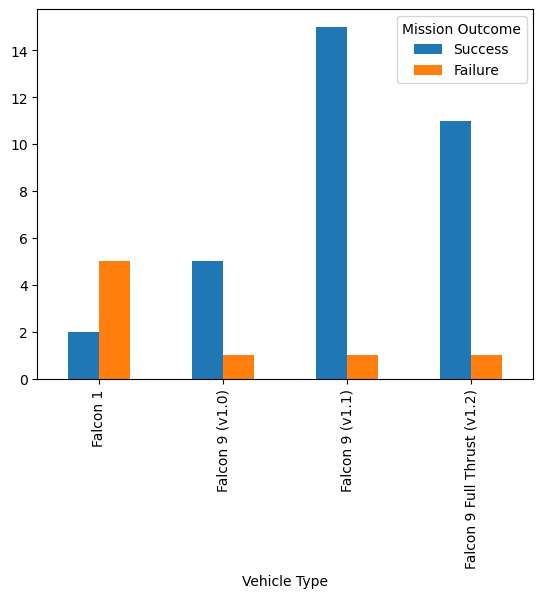

In [71]:
pivot_df.plot.bar(x='Vehicle Type', y=['Success', 'Failure'])

In [72]:
data['Failure Reason'].unique()

array(['Engine Fire During Launch', 'Engine Shutdown During Launch',
       'Collision During Launch', nan, 'Engine Failure During Flight',
       'Vehicle Explosion During Flight',
       'Vehicle Explosion Before Launch'], dtype=object)

In [73]:
mask = data['Failure Reason'].notnull()

In [74]:
reason_fail = data.loc[mask, 'Failure Reason']
reason_fail

0           Engine Fire During Launch
1       Engine Shutdown During Launch
2             Collision During Launch
3             Collision During Launch
4             Collision During Launch
11       Engine Failure During Flight
27    Vehicle Explosion During Flight
38    Vehicle Explosion Before Launch
Name: Failure Reason, dtype: object

In [75]:
reason_fail_ = reason_fail.value_counts()
reason_fail_

Collision During Launch            3
Engine Fire During Launch          1
Engine Shutdown During Launch      1
Engine Failure During Flight       1
Vehicle Explosion During Flight    1
Vehicle Explosion Before Launch    1
Name: Failure Reason, dtype: int64

In [78]:
reason_fail_df = reason_fail_.to_frame()
reason_fail_df

,Failure Reason
Collision During Launch,3
Engine Fire During Launch,1
Engine Shutdown During Launch,1
Engine Failure During Flight,1
Vehicle Explosion During Flight,1
Vehicle Explosion Before Launch,1


In [79]:
reason_fail_df_ = reason_fail_df.reset_index(drop=False)
reason_fail_df_

,index,Failure Reason
0,Collision During Launch,3
1,Engine Fire During Launch,1
2,Engine Shutdown During Launch,1
3,Engine Failure During Flight,1
4,Vehicle Explosion During Flight,1
5,Vehicle Explosion Before Launch,1


In [82]:
reason_fail_df_ro = reason_fail_df_.rename(columns={'index': 'Failure Reason', 'Failure Reason': 'Count'})
reason_fail_df_ro

,Failure Reason,Count
0,Collision During Launch,3
1,Engine Fire During Launch,1
2,Engine Shutdown During Launch,1
3,Engine Failure During Flight,1
4,Vehicle Explosion During Flight,1
5,Vehicle Explosion Before Launch,1


NameError: name 'explode' is not defined

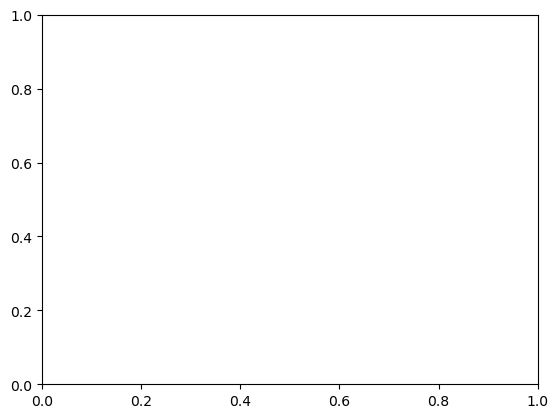

In [86]:
label = 'Collision During Launch', 'Engine Fire During Launch', 'Engine Shutdown During Launch', 'Engine Failure During Flight', 'Vehicle Explosion During Flight', 'Vehicle Explosion Before Launch'
sizes = [3, 1, 1, 1, 1, 1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=label, autopct='%1.1f%%', explode=explode)
#ax.set_title('\nOverview of Israeli-Palestinian Casualties\n');

#reason_fail_df_ro.plot.pie(x='Failure Reason', y='Count')